In [2]:
import sys
sys.path.append("../lropy")

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from lropy.analysis.io import load_simulation_results, load_walltime_duration, pos_names
from lropy.analysis.plotting import format_plot
from lropy.analysis.util import rrmse

## Compare results from regression_test.cpp

In [5]:
results_dir = "../results/regression"
n_repetitions = 10

In [18]:
t_cannonball_new = [load_walltime_duration(f"{results_dir}/cannonball_new/{i}")[0] for i in range(n_repetitions)]
t_paneled_new = [load_walltime_duration(f"{results_dir}/paneled_new/{i}")[0] for i in range(n_repetitions)]
t_cannonball_old = [load_walltime_duration(f"{results_dir}/cannonball_old/{i}")[0] for i in range(n_repetitions)]
t_paneled_old = [load_walltime_duration(f"{results_dir}/paneled_old/{i}")[0] for i in range(n_repetitions)]

In [7]:
df_cannonball_new = load_simulation_results(f"{results_dir}/cannonball_new/0")
df_paneled_new = load_simulation_results(f"{results_dir}/paneled_new/0")
df_cannonball_old = load_simulation_results(f"{results_dir}/cannonball_old/0")
df_paneled_old = load_simulation_results(f"{results_dir}/paneled_old/0")

In [8]:
for df in [df_cannonball_new, df_cannonball_old, df_paneled_new, df_paneled_old]:
    df["acc_rp_sun"] = np.sqrt(np.square(df[[f"acc_rp_sun_x", f"acc_rp_sun_y", f"acc_rp_sun_z"]]).sum(axis=1))

### Accelerations

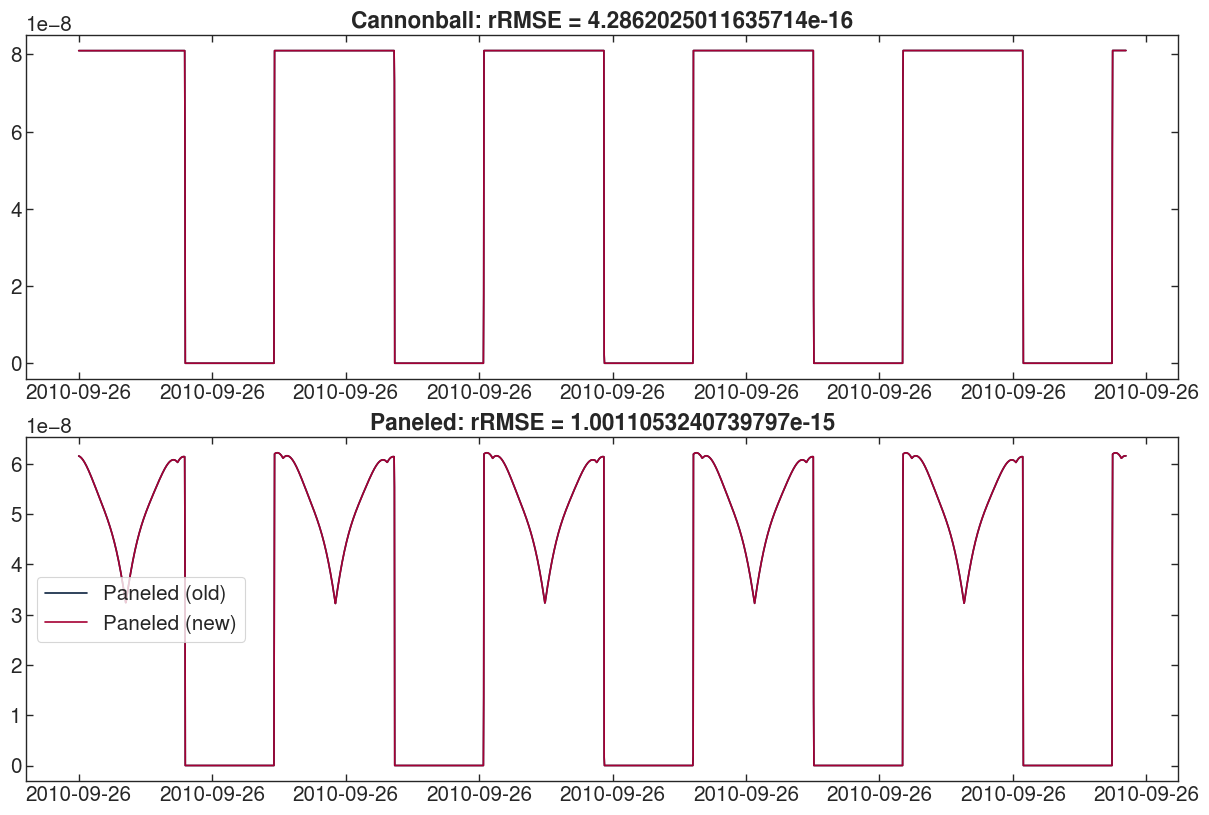

In [30]:
def plot_acc():
    fig, (ax_cannonball, ax_paneled) = plt.subplots(2, figsize=(12, 8))

    ax_cannonball.plot(df_cannonball_old.index, df_cannonball_old["acc_rp_sun"], label="Cannonball (old)")
    ax_cannonball.plot(df_cannonball_new.index, df_cannonball_new["acc_rp_sun"], label="Cannonball (new)")

    acc_diff_rel = rrmse(df_cannonball_old["acc_rp_sun"], df_cannonball_new["acc_rp_sun"])
    ax_cannonball.set_title(f"Cannonball: rRMSE = {acc_diff_rel}")

    ax_paneled.plot(df_paneled_old.index, df_paneled_old["acc_rp_sun"], label="Paneled (old)")
    ax_paneled.plot(df_paneled_new.index, df_paneled_new["acc_rp_sun"], label="Paneled (new)")

    acc_diff_rel = rrmse(df_paneled_old["acc_rp_sun"], df_paneled_new["acc_rp_sun"])
    ax_paneled.set_title(f"Paneled: rRMSE = {acc_diff_rel}")

    plt.legend()

    format_plot()

plot_acc()

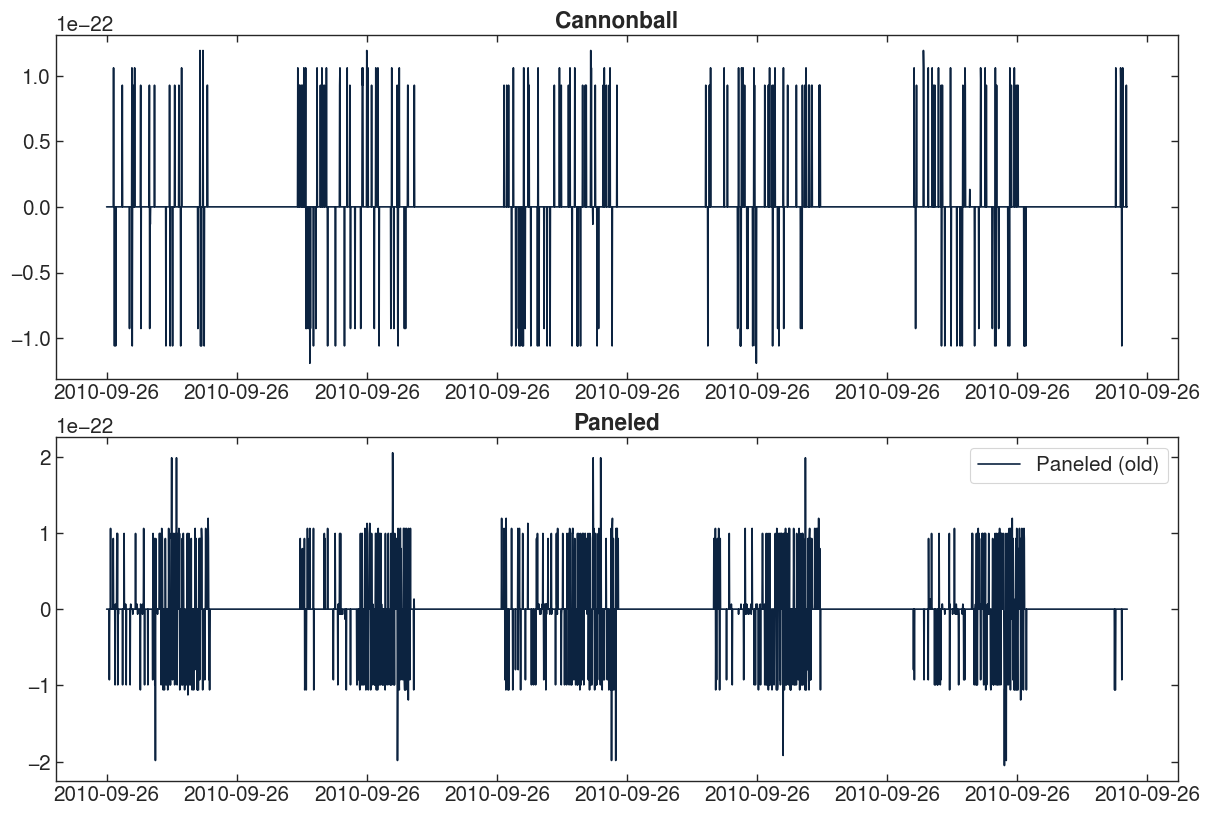

In [31]:
def plot_acc_diff():
    fig, (ax_cannonball, ax_paneled) = plt.subplots(2, figsize=(12, 8))

    ax_cannonball.plot(df_cannonball_old.index, df_cannonball_new["acc_rp_sun"] - df_cannonball_old["acc_rp_sun"], label="Cannonball (old)")
    ax_cannonball.set_title(f"Cannonball")

    ax_paneled.plot(df_paneled_old.index, df_paneled_new["acc_rp_sun"] - df_paneled_old["acc_rp_sun"], label="Paneled (old)")
    ax_paneled.set_title(f"Paneled")

    plt.legend()

    format_plot()

plot_acc_diff()

Barring numerical noise, the old and new implementations give the same results.

### Performance

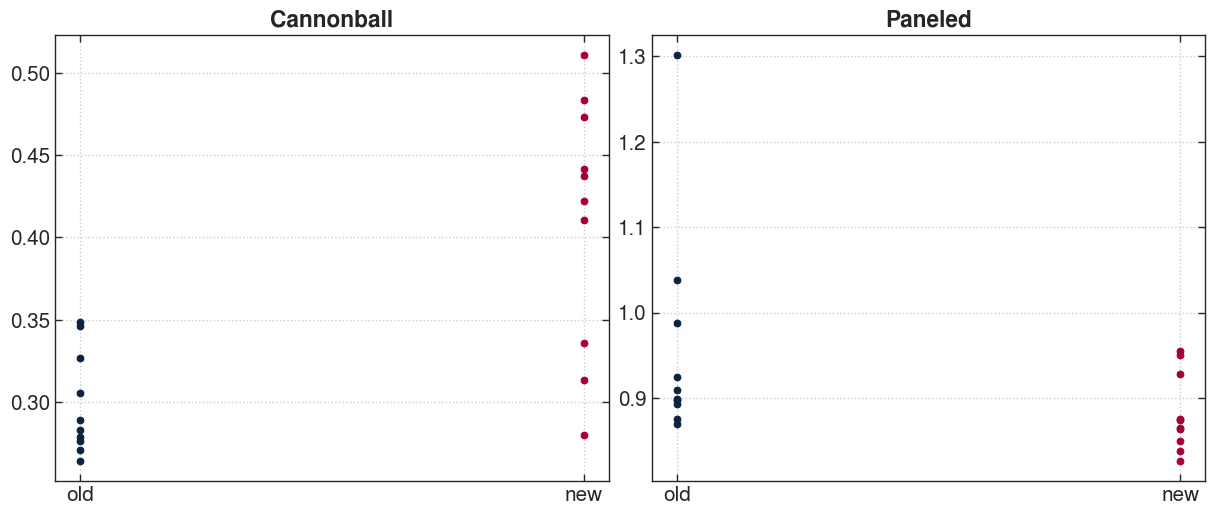

In [27]:
def plot_walltime():
    f, (ax_cannonball, ax_paneled) = plt.subplots(1, 2, figsize=(12, 5))

    ax_cannonball.scatter(x=["old"] * n_repetitions, y=t_cannonball_old)
    ax_cannonball.scatter(x=["new"] * n_repetitions, y=t_cannonball_new)
    ax_cannonball.set_title("Cannonball")

    ax_paneled.scatter(x=["old"] * n_repetitions, y=t_paneled_old)
    ax_paneled.scatter(x=["new"] * n_repetitions, y=t_paneled_new)
    ax_paneled.set_title("Paneled")

    format_plot(major_grid=True, x_major_locator=matplotlib.ticker.FixedLocator([0, 1]))

plot_walltime()

The new cannonball model is negligibly slower, the new paneled model negligibly faster.